<h2>Data Science Machine Learning(Regression) Project : Real Estate price prediction in Melbourne</h2>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split

In [3]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
train_df, test_df = train_test_split(df, train_size = 0.8, random_state=123)
train_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12111,Oak Park,2/36 Curie Av,2,t,545000.0,PI,Hodges,29/07/2017,11.2,3046.0,...,1.0,1.0,0.0,80.0,2013.0,Moreland,-37.71652,144.92268,Northern Metropolitan,2651.0
10146,Brighton,10 Whyte St,4,h,2385000.0,PI,C21,27/05/2017,10.5,3186.0,...,3.0,2.0,373.0,NaN,NaN,Bayside,-37.92465,144.99920,Southern Metropolitan,10579.0
5969,Sunshine,127 Duke St,3,h,655000.0,S,Bells,17/09/2016,12.6,3020.0,...,1.0,1.0,497.0,NaN,NaN,Brimbank,-37.78090,144.84670,Western Metropolitan,3755.0
2900,Glenroy,24 Sadie St,3,h,793000.0,S,Eview,12/11/2016,13.0,3046.0,...,1.0,2.0,780.0,120.0,1960.0,Moreland,-37.70000,144.94270,Northern Metropolitan,8870.0
7983,Heidelberg Heights,23 Flinders St,2,h,682000.0,S,Barry,22/04/2017,10.5,3081.0,...,1.0,0.0,341.0,NaN,NaN,Banyule,-37.73660,145.05090,Eastern Metropolitan,2947.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,Reservoir,5/25 Ashley St,2,u,300000.0,S,Love,26/07/2016,11.2,3073.0,...,1.0,1.0,87.0,62.0,1970.0,Darebin,-37.71740,145.00160,Northern Metropolitan,21650.0
12252,Burwood East,2 Howitt Pl,3,h,930000.0,S,Fletchers,3/09/2017,14.7,3151.0,...,2.0,2.0,369.0,NaN,NaN,NaN,-37.85793,145.13925,Eastern Metropolitan,4048.0
1346,Brunswick,58 Cassels Rd,3,h,860000.0,S,Ray,22/08/2016,5.2,3056.0,...,1.0,1.0,184.0,104.0,1890.0,Moreland,-37.75630,144.96000,Northern Metropolitan,11918.0
11646,Deer Park,15 Abercairn Ct,3,h,572000.0,S,hockingstuart,22/07/2017,14.8,3023.0,...,3.0,6.0,585.0,NaN,NaN,Brimbank,-37.75907,144.75924,Western Metropolitan,6388.0


In [5]:
train_df.describe(include= 'all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,10864,10864,10864.000000,10864,1.086400e+04,10864,10864,10864,10864.000000,10864.000000,...,10864.000000,10814.000000,10864.000000,5650.000000,6523.000000,9758,10864.000000,10864.000000,10864,10864.000000
unique,312,10740,NaN,3,NaN,5,249,58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32,NaN,NaN,8,NaN
top,Reservoir,36 Aberfeldie St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Moreland,NaN,NaN,Southern Metropolitan,NaN
freq,294,3,NaN,7558,NaN,7214,1226,380,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,927,NaN,NaN,3807,NaN
mean,NaN,NaN,2.940446,NaN,1.078480e+06,NaN,NaN,NaN,10.153433,3105.706094,...,1.533413,1.614296,567.756075,153.741076,1964.789514,NaN,-37.809500,144.996405,NaN,7450.259113
std,NaN,NaN,0.957942,NaN,6.464674e+05,NaN,NaN,NaN,5.859901,89.342127,...,0.694256,0.974389,4425.744620,604.882609,37.558965,NaN,0.079486,0.103271,NaN,4391.064411
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.000000,1196.000000,NaN,-38.182550,144.431810,NaN,249.000000
25%,NaN,NaN,2.000000,NaN,6.500000e+05,NaN,NaN,NaN,6.200000,3046.000000,...,1.000000,1.000000,175.000000,93.000000,1940.000000,NaN,-37.857300,144.931700,NaN,4380.000000
50%,NaN,NaN,3.000000,NaN,9.050000e+05,NaN,NaN,NaN,9.250000,3084.500000,...,1.000000,2.000000,438.000000,125.000000,1970.000000,NaN,-37.803400,145.001100,NaN,6567.000000
75%,NaN,NaN,3.000000,NaN,1.330000e+06,NaN,NaN,NaN,13.000000,3149.000000,...,2.000000,2.000000,650.000000,174.000000,1999.500000,NaN,-37.755778,145.058825,NaN,10331.000000


In [6]:
train_df.shape

(10864, 21)

In [7]:
train_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [9]:
train_df['Method'].unique()

array(['PI', 'S', 'VB', 'SP', 'SA'], dtype=object)

In [10]:
train_df['Method'].value_counts()

Method
S     7214
SP    1334
PI    1276
VB     969
SA      71
Name: count, dtype: int64

In [11]:
train_df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                50
Landsize            0
BuildingArea     5214
YearBuilt        4341
CouncilArea      1106
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

<h3> EDA </h3>

<h4> Univariate Analysis</h4>

/Users/bt2805/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bt2805/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


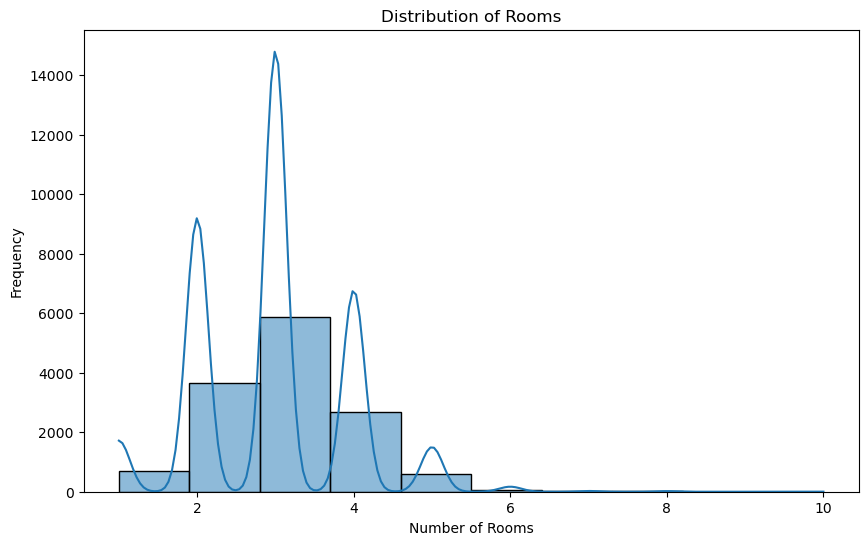

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Rooms'
plt.figure(figsize=(10, 6))
sns.histplot(df['Rooms'], kde=True, bins=10)
plt.title('Distribution of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Frequency')
plt.show()




/Users/bt2805/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bt2805/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


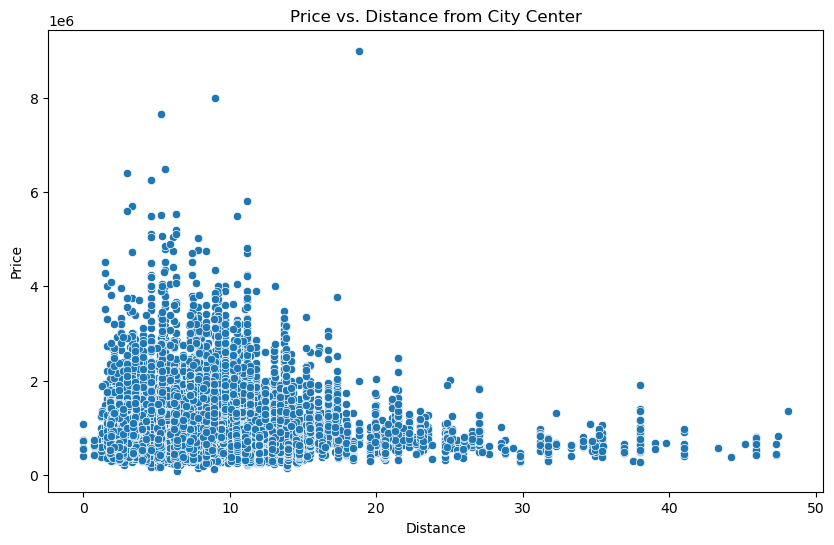

In [13]:
# Scatter plot for 'Price' vs. 'Distance'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df)
plt.title('Price vs. Distance from City Center')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

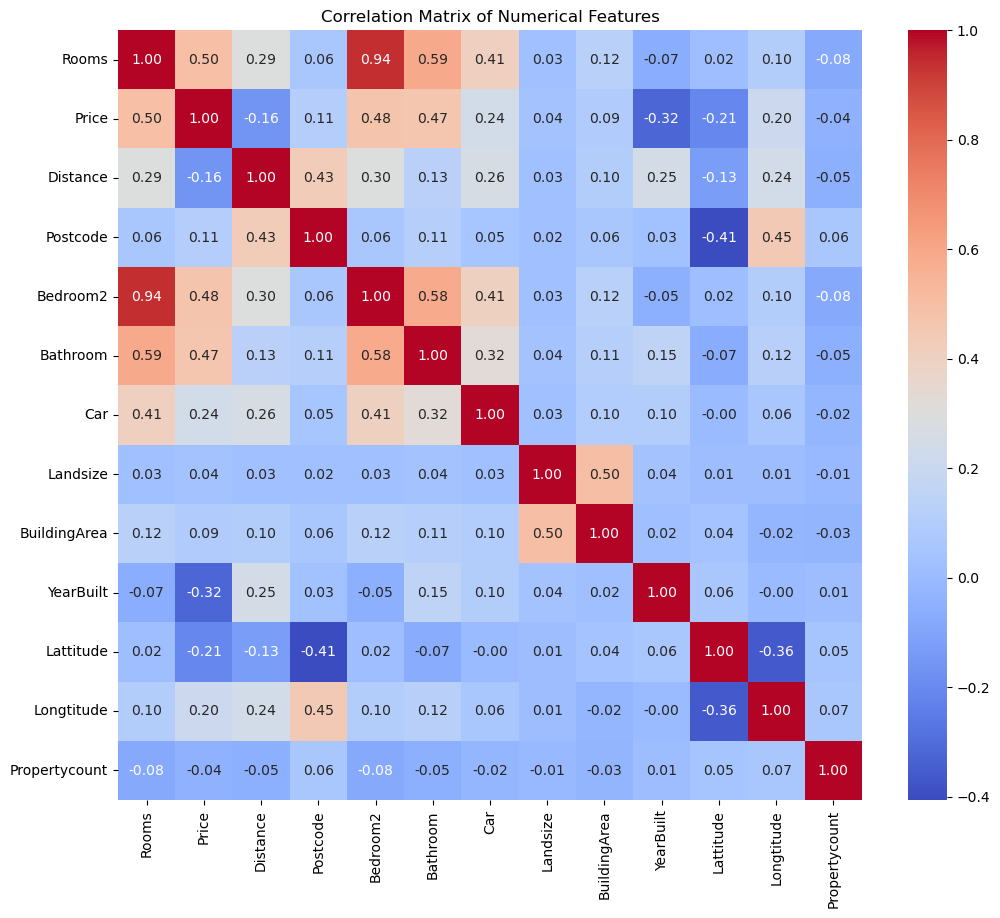

In [14]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

/Users/bt2805/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/bt2805/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


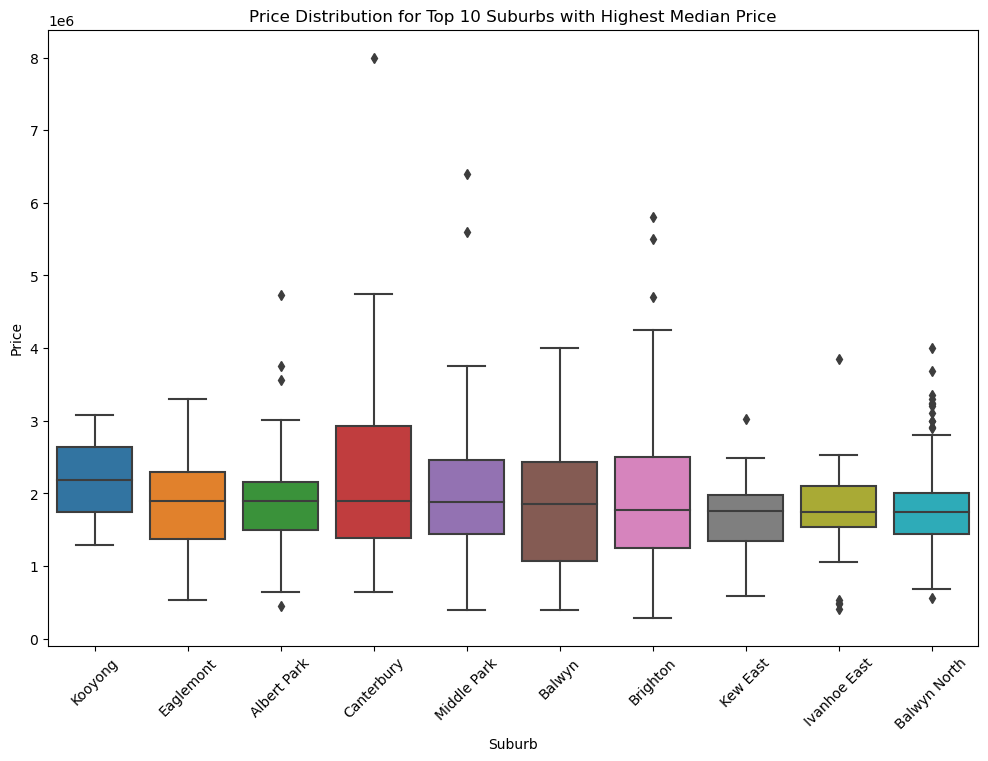

In [15]:
median_price_per_suburb = df.groupby('Suburb')['Price'].median().sort_values(ascending=False)

# Select top 10 suburbs with the highest median price
top_suburbs = median_price_per_suburb.head(10).index

# Filter the DataFrame to include only the top suburbs
top_suburbs_df = df[df['Suburb'].isin(top_suburbs)]

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='Suburb', y='Price', data=top_suburbs_df, order=top_suburbs)
plt.title('Price Distribution for Top 10 Suburbs with Highest Median Price')
plt.xticks(rotation=45)  # Rotate suburb names for better readability
plt.xlabel('Suburb')
plt.ylabel('Price')
plt.show()









<h3> Data Cleaning: Handling missing values</h3>

In [16]:
train_df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                50
Landsize            0
BuildingArea     5214
YearBuilt        4341
CouncilArea      1106
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [17]:
train_df = train_df.drop(['YearBuilt', 'CouncilArea','BuildingArea'], axis=1)

In [18]:
train_df.isnull().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Date              0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          0
Car              50
Landsize          0
Lattitude         0
Longtitude        0
Regionname        0
Propertycount     0
dtype: int64

In [20]:
imputer = SimpleImputer(strategy='median')
train_df['Car'] = imputer.fit_transform(train_df[['Car']])
test_df['Car'] = imputer.transform(test_df[['Car']])


print(train_df['Car'].isnull().sum())  # Should be 0
print(test_df['Car'].isnull().sum())   # Should be 0

0
0


<h3>Feature Engineering</h3>

In [22]:
def add_price_per_sqft(data):
    data = data.copy()
    data['price_per_sqft'] = data['Price'] / data['Landsize'].replace(0, np.nan)
    return data


train_df = add_price_per_sqft(train_df)
test_df = add_price_per_sqft(test_df)

In [24]:
print(train_df.head())

                   Suburb         Address  Rooms Type      Price Method  \
12111            Oak Park   2/36 Curie Av      2    t   545000.0     PI   
10146            Brighton     10 Whyte St      4    h  2385000.0     PI   
5969             Sunshine     127 Duke St      3    h   655000.0      S   
2900              Glenroy     24 Sadie St      3    h   793000.0      S   
7983   Heidelberg Heights  23 Flinders St      2    h   682000.0      S   

      SellerG        Date  Distance  Postcode  Bedroom2  Bathroom  Car  \
12111  Hodges  29/07/2017      11.2    3046.0       2.0       1.0  1.0   
10146     C21  27/05/2017      10.5    3186.0       4.0       3.0  2.0   
5969    Bells  17/09/2016      12.6    3020.0       3.0       1.0  1.0   
2900    Eview  12/11/2016      13.0    3046.0       3.0       1.0  2.0   
7983    Barry  22/04/2017      10.5    3081.0       2.0       1.0  0.0   

       Landsize  Lattitude  Longtitude             Regionname  Propertycount  \
12111       0.0  -37.716

In [25]:
train_df = train_df.dropna(subset=['price_per_sqft'])
test_df = test_df.dropna(subset=['price_per_sqft'])

In [26]:
print(train_df['price_per_sqft'].isna().sum())

0


In [28]:
train_df.describe(include="all")

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,price_per_sqft
count,9293,9293,9293.000000,9293,9.293000e+03,9293,9293,9293,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293.000000,9293,9293.000000,9293.000000
unique,310,9183,NaN,3,NaN,5,234,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN
top,Reservoir,28 Blair St,NaN,h,NaN,S,Nelson,27/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,NaN,NaN
freq,275,3,NaN,7420,NaN,6321,1048,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2972,NaN,NaN
mean,NaN,NaN,3.104272,NaN,1.151374e+06,NaN,NaN,NaN,10.795136,3105.292155,3.077155,1.583773,1.698375,663.736361,-37.807005,144.997859,NaN,7314.638868,3393.293204
std,NaN,NaN,0.895651,NaN,6.552795e+05,NaN,NaN,NaN,5.928834,93.048473,0.916539,0.709692,1.001803,4778.610340,0.083110,0.109422,NaN,4411.334030,10709.380106
min,NaN,NaN,1.000000,NaN,1.310000e+05,NaN,NaN,NaN,0.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,-38.182550,144.431810,NaN,249.000000,6.235364
25%,NaN,NaN,3.000000,NaN,7.150000e+05,NaN,NaN,NaN,6.900000,3044.000000,3.000000,1.000000,1.000000,269.000000,-37.857500,144.925480,NaN,4019.000000,1387.468031
50%,NaN,NaN,3.000000,NaN,9.755000e+05,NaN,NaN,NaN,10.400000,3084.000000,3.000000,1.000000,2.000000,533.000000,-37.796900,145.004630,NaN,6482.000000,2367.288379
75%,NaN,NaN,4.000000,NaN,1.400000e+06,NaN,NaN,NaN,13.600000,3147.000000,4.000000,2.000000,2.000000,676.000000,-37.749650,145.067200,NaN,9704.000000,3986.175115
